<a href="https://colab.research.google.com/github/prajwal-mv/Netflix_Movies_And_TV_Shows_Clusterig/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title** :**Netflix_Movies_And_TV_Shows_Clusterig**



![alt text](https://wallpapercave.com/wp/wp5063348.jpg)

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Import Libraries and Data.** 

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 131 kB/s 


In [4]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [5]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the data.
netflix_data = pd.read_csv('/content/drive/MyDrive/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **First Look.**

In [7]:
# Fisrt 5 values.
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
# Last 5 values.
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [9]:
# Shape of the data.
netflix_data.shape

(7787, 12)

In [10]:
# Basic info about the data.
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [11]:
# Check for null values.
for col in netflix_data.columns:
  null_rate = netflix_data[col].isnull().sum() / len(netflix_data) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


In [12]:
# Check for duplicated entries.
netflix_data.duplicated().sum()

0

In [13]:
# Statistical info.
netflix_data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


***Points to be noted:*** 

* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.




***Lets clean the data before we go any further.***

***First replace few null values.*** 

In [14]:
# Number of null values in date_added.
netflix_data.date_added.isnull().sum()

10

In [15]:
# Remove null values in date_added.
netflix_data.dropna(subset=['date_added'], inplace=True)

In [16]:
# Number of null values in rating.
netflix_data.rating.isnull().sum()

7

In [17]:
# Remove null values in rating.
netflix_data.dropna(subset=['rating'], inplace=True)

In [18]:
# Check the shape of our data.
netflix_data.shape

(7770, 12)

***There go the null values...***

***As for the rest of the columns containing null values, we will handle them accordingly in future analyses.***

***Second, add few more datetime features.***

In [19]:
# Create new features to store date, day, month and year seperately.
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])  # First convert date_added to date time format.
netflix_data['day_added'] = netflix_data['date_added'].dt.day            # Compute day.
netflix_data['year_added'] = netflix_data['date_added'].dt.year          # Compute year.
netflix_data['month_added'] = netflix_data['date_added'].dt.month        # Compute month.

***Now lets start with EDA.***

# **Exploratory Data Analysis: in Netflix Style** 


### **Content Type On Netflix:** 

([<matplotlib.patches.Wedge at 0x7fc88b879c10>,
 [Text(-0.9071052118424069, -0.6222219335963192, 'Movie'),
  Text(0.9895693220098982, 0.6787875639232577, 'TV Show')],
 [Text(-0.49478466100494917, -0.33939378196162856, '69.14%'),
  Text(0.5772487711724406, 0.3959594122885669, '30.86%')])

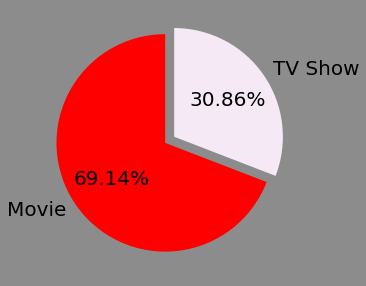

In [20]:
# Pie chart showing percentage of toal movies and TV shows.
# Choose this facecolor so as to give style of netflix
fig, ax = plt.subplots(figsize=(5,5),facecolor="#8C8C8C")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(netflix_data['type'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Movie', 'TV Show'],shadow=False,
       startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

* Movies uploaded on Netflix are more than twice the TV Shows uploaded.
* This dose not implies that movies are more indulging that of TV Shows.
* Beacuase TV shows may have several seasons which consits of number of episodes.
* Duration of TV shows are much more that of movies.

## Number of Movies and TV Shows added on netflix.

### On Yearly Basis

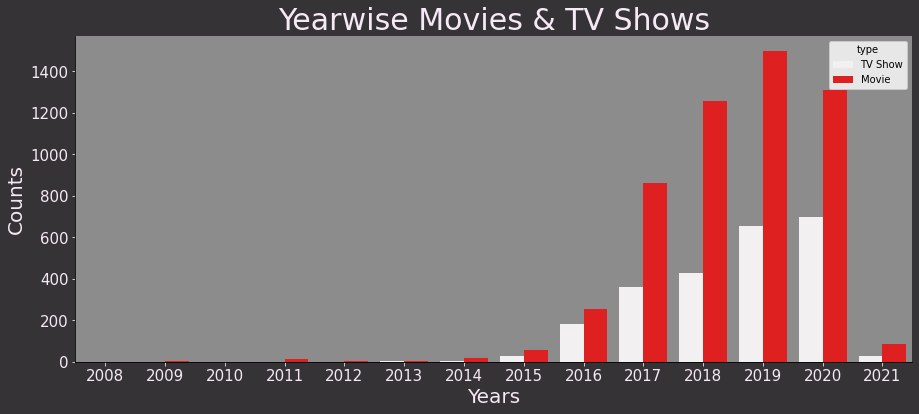

In [22]:
fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.countplot(x='year_added', hue='type',lw=5, color='red', data=netflix_data, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Years", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Yearwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

* TV shows are incresing continuosly.
* Movies were incresing continuosly but after 2019 there is fall.

### On Monthly Basis

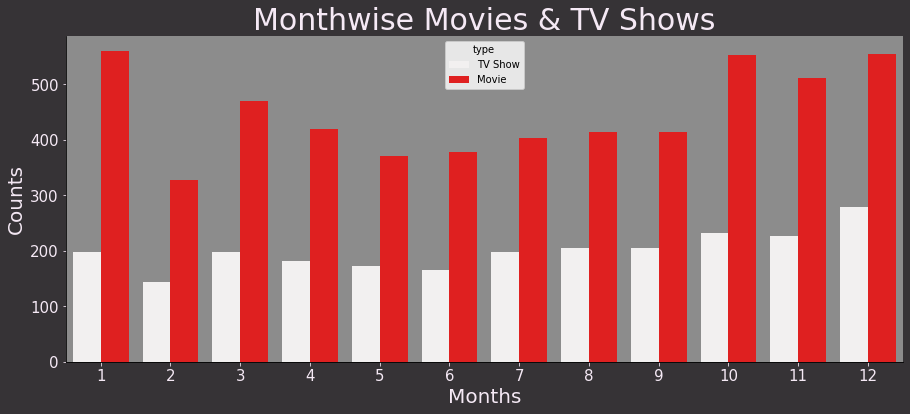

In [24]:
fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.countplot(x='month_added', hue='type',lw=5, color='red', data=netflix_data, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Months", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Monthwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

* From Octomber to January, maximum number of movies and TV shows were added.
* Possible reason for that is, during this period of time events such as Christmas, New Year and several holidays takes place.

### On Daily Basis

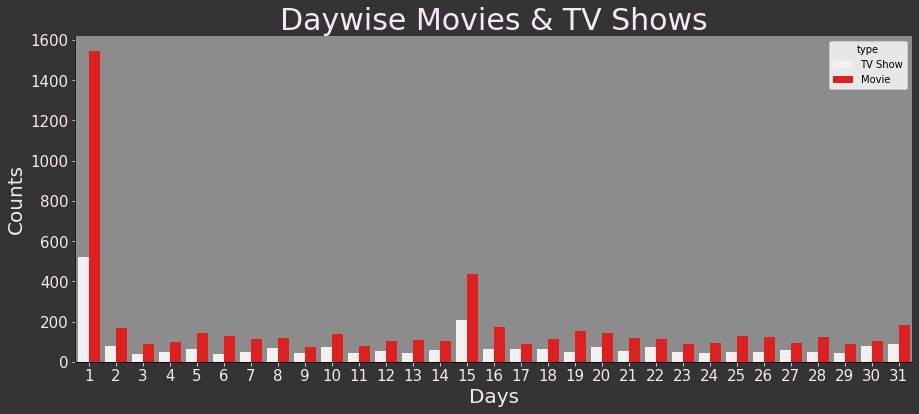

In [25]:
fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.countplot(x='day_added', hue='type',lw=5, color='red', data=netflix_data, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Days", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Daywise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

## Wordwide Presence of Netflix

* Popularity Netflix is all over the world.

*   List item



* Lets look for its highest presence over countries.

### Top 10 Countries having maximum Movies and TV Shows

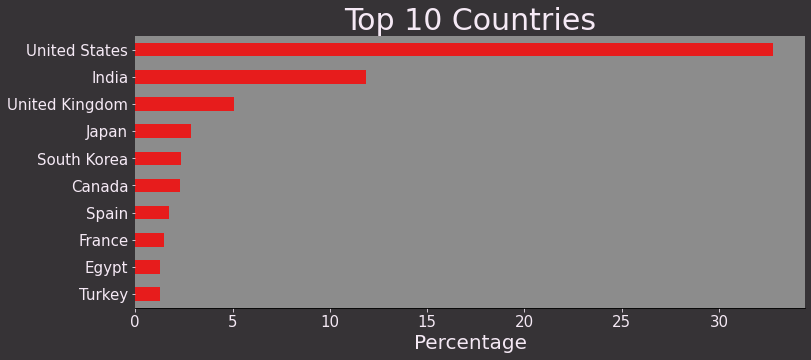

In [27]:
fig, ax = plt.subplots(figsize=(12,5),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
(netflix_data['country'].value_counts().sort_values()/netflix_data.shape[0]*100)[-10:].plot(kind='barh', ax=ax,color ='red',alpha=0.8)
ax.tick_params(axis= 'x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_title("Top 10 Countries", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

* Unites State tops the in list of maximum number of movies and TV shows.
* Followed by India, UK and Japan.

## Ratings on Movies and TV Shows

**For Movies:**
* G: Kids
* PG: Older Kids (7+)
* PG-13: Teens (13+)
* NC-17, NR, R, Unrated: Adults (18+)


**For TV Shows:**
* TV-G, TV-Y: Kids
* TV-Y7/FV/PG: Older Kids (7+)
* TV-14: Young Adults (16+)
* TV-MA: Adults (18+)


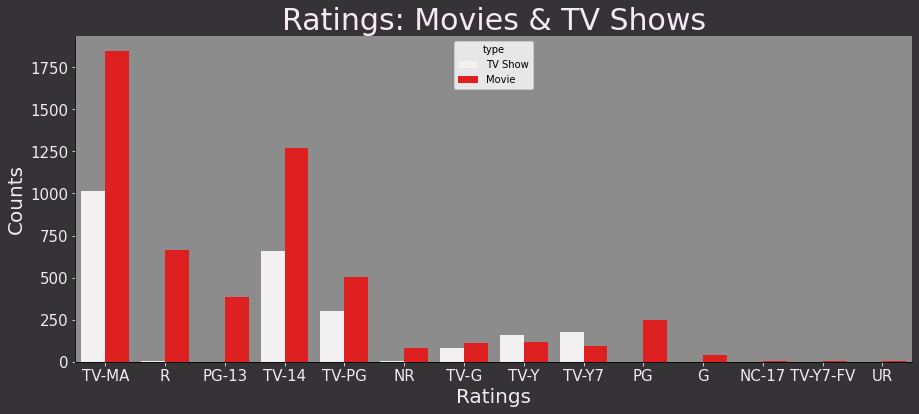

In [28]:
fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.countplot(x='rating', hue='type',lw=5, color='red', data=netflix_data, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Ratings", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Ratings: Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)


* Maximum of the movies as well as TV shows are for matures only.
